In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.neighbors import DistanceMetric
from math import radians

# Junho


In [2]:
junho = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_junho.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 214k linhas

In [3]:
junho

,device_id,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,duration
0,617.0,1622529842,1622529920,40:06:a0:5b:8c:b2,-45,11,-22.827145,-47.061214,-22.829490,-47.060281,40,0,78
1,617.0,1622529842,1622529920,0c:ef:af:d3:00:36,-65,11,-22.827145,-47.061214,-22.829490,-47.060281,15,1,78
2,617.0,1622529847,1622529875,24:fd:0d:bd:91:49,-67,6,-22.826890,-47.061367,-22.826994,-47.061368,3,2,28
3,617.0,1622529850,1622529850,0e:ec:8d:d0:6d:0d,-90,7,-22.826730,-47.061454,-22.826730,-47.061454,2,3,0
4,617.0,1622529856,1622529856,0a:cc:27:40:31:3c,-87,4,-22.826406,-47.061626,-22.826406,-47.061626,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,NaN,1625079190,1625079190,22:ae:9f:77:09:55,-85,1,-22.816560,-47.072811,-22.816560,-47.072811,1,524,0
214542,NaN,1625079193,1625079196,50:92:b9:3b:a7:2a,-91,11,-22.816561,-47.072812,-22.816566,-47.072808,3,525,3
214543,NaN,1625079121,1625079121,ae:30:5e:57:df:56,-88,6,-22.816467,-47.072852,-22.816467,-47.072852,1,512,0
214544,NaN,1625079196,1625079196,28:16:7f:bc:c4:42,-93,6,-22.816566,-47.072808,-22.816566,-47.072808,1,526,0



## Preparacao dos dados

In [4]:
junho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214546 entries, 0 to 214545
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   106336 non-null  float64
 1   timestampI  214546 non-null  int64  
 2   timestampF  214546 non-null  int64  
 3   MAC         214546 non-null  object 
 4   RSSI        214546 non-null  int64  
 5   channel     214546 non-null  int64  
 6   latitudeI   214546 non-null  float64
 7   longitudeI  214546 non-null  float64
 8   latitudeF   214546 non-null  float64
 9   longitudeF  214546 non-null  float64
 10  cnt_pckg    214546 non-null  int64  
 11  id          214546 non-null  int64  
 12  duration    214546 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 22.9+ MB


In [5]:
## Tranforma timestamp em datas

junho['dataInicio'] = pd.to_datetime(junho['timestampI'], unit='s')
junho['dataFim'] = pd.to_datetime(junho['timestampF'], unit='s')

In [6]:
junho = junho[['MAC','latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 'duration', 'dataInicio', 'dataFim']]

In [7]:
## Cria a coluna com o dia de cada ping para os agrupamentos

junho['day'] = junho.dataInicio.dt.day

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_8949/1329112363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['day'] = junho.dataInicio.dt.day


In [8]:
## Cria coluna de ID para cada um dos MACS para facilitar identificacao

MACs_unicos = junho.MAC.unique()

temp = defaultdict(lambda: len(temp))
device_id = [temp[ele] for ele in MACs_unicos]

res = dict(zip(MACs_unicos, device_id))

junho['device_id'] = junho['MAC'].map(res)
junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_8949/3466128123.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['device_id'] = junho['MAC'].map(res)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0
1,0c:ef:af:d3:00:36,-22.827145,-47.061214,-22.829490,-47.060281,15,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,1
2,24:fd:0d:bd:91:49,-22.826890,-47.061367,-22.826994,-47.061368,3,28,2021-06-01 06:44:07,2021-06-01 06:44:35,1,2
3,0e:ec:8d:d0:6d:0d,-22.826730,-47.061454,-22.826730,-47.061454,2,0,2021-06-01 06:44:10,2021-06-01 06:44:10,1,3
4,0a:cc:27:40:31:3c,-22.826406,-47.061626,-22.826406,-47.061626,2,0,2021-06-01 06:44:16,2021-06-01 06:44:16,1,4
...,...,...,...,...,...,...,...,...,...,...,...
214541,22:ae:9f:77:09:55,-22.816560,-47.072811,-22.816560,-47.072811,1,0,2021-06-30 18:53:10,2021-06-30 18:53:10,30,75896
214542,50:92:b9:3b:a7:2a,-22.816561,-47.072812,-22.816566,-47.072808,3,3,2021-06-30 18:53:13,2021-06-30 18:53:16,30,11104
214543,ae:30:5e:57:df:56,-22.816467,-47.072852,-22.816467,-47.072852,1,0,2021-06-30 18:52:01,2021-06-30 18:52:01,30,75890
214544,28:16:7f:bc:c4:42,-22.816566,-47.072808,-22.816566,-47.072808,1,0,2021-06-30 18:53:16,2021-06-30 18:53:16,30,68306


In [10]:
## Adiciona sequence para identificar dentro de um dia de qual a o numero da conexao atual (em uma lista ordenada)

junho.sort_values(by= ['device_id', 'dataInicio'], inplace = True)

junho['sequence'] = junho.groupby(['dataInicio','device_id']).cumcount()+1

junho.reset_index(drop = True, inplace = True)

junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_8949/4089924519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['sequence']=junho.groupby(['day','device_id']).cumcount()+1


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1
11,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2
203,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3
16,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4
294,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
214536,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75892,1
214537,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75893,1
214539,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75894,1
214540,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75895,1


## Agrupamentio dos usuarios por dias contando numero de conexoes

Aqui pode haver mais coisas a se fazer

Como eh possivel ver no caso do dia=1 device=0
 - a data de inicio eh no dia 1, e a data fim eh no dia 2
 - isso nao acontece pra todos os devices, mas para os que acontecem pode ser retrabalhado

In [13]:
junho_grouped = junho.groupby(['day','device_id']).agg({
                                                        'dataInicio': 'min',
                                                        'dataFim':'max',
                                                        'cnt_pckg':'count'})

junho_grouped.sort_values(by = ['day', 'cnt_pckg'], ascending=[True, False])

dataInicio             dataFim  cnt_pckg
day device_id                                                  
1   0         2021-06-01 06:44:02 2021-06-02 06:17:22        22
    1         2021-06-01 06:44:02 2021-06-02 06:17:22        18
    69        2021-06-01 07:34:10 2021-06-01 19:24:18        14
    80        2021-06-01 07:34:23 2021-06-01 19:24:20        14
    82        2021-06-01 07:34:26 2021-06-01 19:24:11        14
...                           ...                 ...       ...
30  75892     2021-06-30 18:52:56 2021-06-30 18:52:56         1
    75893     2021-06-30 18:52:59 2021-06-30 18:53:02         1
    75894     2021-06-30 18:53:06 2021-06-30 18:53:06         1
    75895     2021-06-30 18:53:09 2021-06-30 18:53:09         1
    75896     2021-06-30 18:53:10 2021-06-30 18:53:10         1

[122526 rows x 3 columns]

#### Recuperando a primeira e ultima coordenada

 - Usando o usuario/MAC e o primeiro e ultimo momento em conexao
 - Buscar as coordenadas desses dispositivos nesse instante (inicial e final)
 - Comparar com a coordenada dos pontos de onibus para determinar qual o ponto de embarque do passageiro e ponto de desembarque

In [14]:
junho_coordenadas = junho_grouped.merge(junho[['device_id', 'dataInicio', 'latitudeI', 'longitudeI']],  
                                        right_on= [ 'device_id', 'dataInicio'], 
                                        left_on=  ['device_id', 'dataInicio']).merge(
                                            junho[['device_id', 'dataFim', 'latitudeF', 'longitudeF']],  
                                            right_on= [ 'device_id', 'dataFim'], 
                                            left_on=  ['device_id', 'dataFim'])
junho_coordenadas

,device_id,dataInicio,dataFim,cnt_pckg,latitudeI,longitudeI,latitudeF,longitudeF
0,0,2021-06-01 06:44:02,2021-06-02 06:17:22,22,-22.827145,-47.061214,-22.829826,-47.059970
1,1,2021-06-01 06:44:02,2021-06-02 06:17:22,18,-22.827145,-47.061214,-22.829826,-47.059970
2,2,2021-06-01 06:44:07,2021-06-01 16:43:12,11,-22.826890,-47.061367,-22.827011,-47.061384
3,3,2021-06-01 06:44:10,2021-06-01 06:44:10,1,-22.826730,-47.061454,-22.826730,-47.061454
4,4,2021-06-01 06:44:16,2021-06-01 06:44:16,1,-22.826406,-47.061626,-22.826406,-47.061626
...,...,...,...,...,...,...,...,...
123226,75892,2021-06-30 18:52:56,2021-06-30 18:52:56,1,-22.816555,-47.072823,-22.816555,-47.072823
123227,75893,2021-06-30 18:52:59,2021-06-30 18:53:02,1,-22.816558,-47.072823,-22.816554,-47.072819
123228,75894,2021-06-30 18:53:06,2021-06-30 18:53:06,1,-22.816561,-47.072818,-22.816561,-47.072818
123229,75895,2021-06-30 18:53:09,2021-06-30 18:53:09,1,-22.816560,-47.072812,-22.816560,-47.072812


## Selecao de passageiros validos

In [15]:
## Criando coluna da Duracao da conexao

junho_coordenadas['duration(s)'] = (junho_coordenadas['dataFim'] - junho_coordenadas['dataInicio']).dt.total_seconds()
junho_coordenadas.sort_values(by='cnt_pckg', ascending = False)

,device_id,dataInicio,dataFim,cnt_pckg,latitudeI,longitudeI,latitudeF,longitudeF,duration(s)
66519,271,2021-06-16 07:15:42,2021-06-16 19:20:16,27,-22.825001,-47.065753,-22.825281,-47.066445,43474.0
66458,125,2021-06-16 06:48:45,2021-06-16 19:19:58,27,-22.824856,-47.065213,-22.824991,-47.065686,45073.0
66492,203,2021-06-16 06:46:56,2021-06-17 03:06:08,27,-22.829418,-47.064987,-22.954507,-47.008918,73152.0
66451,117,2021-06-16 06:48:37,2021-06-16 19:19:48,26,-22.825206,-47.065380,-22.824893,-47.065296,45071.0
66454,121,2021-06-16 07:15:10,2021-06-16 19:20:08,26,-22.825372,-47.065894,-22.825134,-47.066113,43498.0
...,...,...,...,...,...,...,...,...,...
46445,30892,2021-06-11 08:33:39,2021-06-11 08:33:41,1,-22.820469,-47.068233,-22.820599,-47.068172,2.0
46444,30862,2021-06-11 16:12:39,2021-06-11 16:13:07,1,-22.824936,-47.065610,-22.825393,-47.066562,28.0
46443,30800,2021-06-11 12:01:03,2021-06-11 12:01:03,1,-22.818932,-47.072402,-22.818932,-47.072402,0.0
46442,30746,2021-06-11 12:11:24,2021-06-11 12:11:24,1,-22.818132,-47.062206,-22.818132,-47.062206,0.0


Referencia

https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/

In [16]:
## verificando quais datas inicio sao maiores que a data fim (o que eh imcompativel)

junho_coordenadas.loc[junho_coordenadas['dataInicio'] > junho_coordenadas['dataFim']]

,device_id,dataInicio,dataFim,cnt_pckg,latitudeI,longitudeI,latitudeF,longitudeF,duration(s)


In [17]:
# junho_coordenadas['latitudeI_r'] = np.radians(junho_coordenadas['latitudeI'])
# junho_coordenadas['longitudeI_r'] = np.radians(junho_coordenadas['longitudeI'])

# junho_coordenadas['latitudeF_r'] = np.radians(junho_coordenadas['latitudeF'])
# junho_coordenadas['longitudeF_r'] = np.radians(junho_coordenadas['longitudeF'])

In [18]:
## Gerando a coluna da Distancia Haversiana


def haversine_vectorize(lon1, lat1, lon2, lat2):
    # print(lon1, lat1, lon2, lat2)
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    m = 6_367_000 * dist #6367 for distance in KM for miles use 3958
    return m

junho_coordenadas['distance(m)'] = junho_coordenadas.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']), axis = 1)

junho_coordenadas

,device_id,dataInicio,dataFim,cnt_pckg,latitudeI,longitudeI,latitudeF,longitudeF,duration(s),distance(m)
0,0,2021-06-01 06:44:02,2021-06-02 06:17:22,22,-22.827145,-47.061214,-22.829826,-47.059970,84800.0,324.027495
1,1,2021-06-01 06:44:02,2021-06-02 06:17:22,18,-22.827145,-47.061214,-22.829826,-47.059970,84800.0,324.027495
2,2,2021-06-01 06:44:07,2021-06-01 16:43:12,11,-22.826890,-47.061367,-22.827011,-47.061384,35945.0,13.558404
3,3,2021-06-01 06:44:10,2021-06-01 06:44:10,1,-22.826730,-47.061454,-22.826730,-47.061454,0.0,0.000000
4,4,2021-06-01 06:44:16,2021-06-01 06:44:16,1,-22.826406,-47.061626,-22.826406,-47.061626,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
123226,75892,2021-06-30 18:52:56,2021-06-30 18:52:56,1,-22.816555,-47.072823,-22.816555,-47.072823,0.0,0.000000
123227,75893,2021-06-30 18:52:59,2021-06-30 18:53:02,1,-22.816558,-47.072823,-22.816554,-47.072819,3.0,0.604525
123228,75894,2021-06-30 18:53:06,2021-06-30 18:53:06,1,-22.816561,-47.072818,-22.816561,-47.072818,0.0,0.000000
123229,75895,2021-06-30 18:53:09,2021-06-30 18:53:09,1,-22.816560,-47.072812,-22.816560,-47.072812,0.0,0.000000


### Casos para corte dos passageiros validos

- Ha casos em que a duracao conexao de um passageiro eh superior a 47000 segundos (12h)
    - isso ocorre para passageiros que usam a linha diariamente
    - assim a dataInicio ocorre no fim de um dia e a dataFim no inicio de outro
- Com isso deve-se faze rum corte para retirar essas anomalia

In [29]:
## Caso retirando as conexoes com duracao maior que 6h

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  )]

#  antes 4333

,device_id,dataInicio,dataFim,cnt_pckg,latitudeI,longitudeI,latitudeF,longitudeF,duration(s),distance(m)
168,168,2021-06-01 07:38:59,2021-06-01 07:43:08,1,-22.829313,-47.065591,22.825704,-47.066347,249.0,5.073419e+06
554,554,2021-06-01 09:18:31,2021-06-01 09:36:46,1,-22.825226,-47.066265,-22.818999,-47.064686,1095.0,7.106247e+02
616,616,2021-06-01 09:22:12,2021-06-01 09:23:28,1,-22.829517,-47.063329,-22.827852,-47.066711,76.0,3.927049e+02
670,670,2021-06-01 09:24:51,2021-06-01 09:32:50,1,-22.825683,-47.066245,-22.813499,-47.061077,479.0,1.453748e+03
780,780,2021-06-01 09:36:23,2021-06-01 09:39:08,1,-22.817963,-47.063934,-22.814540,-47.072093,165.0,9.182197e+02
...,...,...,...,...,...,...,...,...,...,...
121691,74372,2021-06-30 09:20:17,2021-06-30 09:23:03,1,-22.828181,-47.066515,-22.823171,-47.068615,166.0,5.968406e+02
122627,75299,2021-06-30 16:15:30,2021-06-30 16:40:28,1,-22.821159,-47.067949,-22.815148,-47.072541,1498.0,8.169570e+02
122663,75335,2021-06-30 16:21:45,2021-06-30 16:26:48,1,-22.829544,-47.062912,-22.822227,-47.069446,303.0,1.053093e+03
122693,75365,2021-06-30 16:24:24,2021-06-30 16:26:33,1,-22.825440,-47.065998,-22.822692,-47.069018,129.0,4.346622e+02


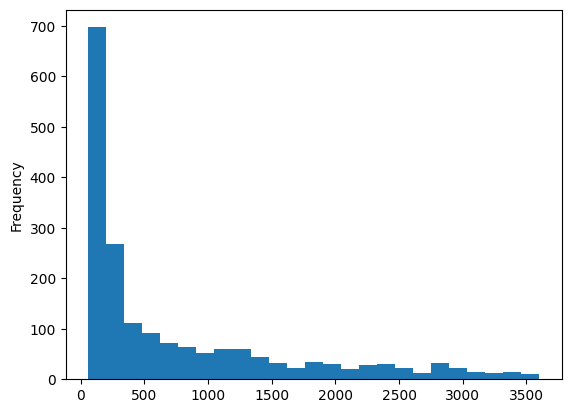

In [35]:
junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

In [36]:
## Caso mantendo as conexoes com duracao maior que 6h

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  )]

,device_id,dataInicio,dataFim,cnt_pckg,latitudeI,longitudeI,latitudeF,longitudeF,duration(s),distance(m)
0,0,2021-06-01 06:44:02,2021-06-02 06:17:22,22,-22.827145,-47.061214,-22.829826,-47.059970,84800.0,324.027495
1,1,2021-06-01 06:44:02,2021-06-02 06:17:22,18,-22.827145,-47.061214,-22.829826,-47.059970,84800.0,324.027495
6,6,2021-06-01 06:44:46,2021-06-01 19:01:08,2,-22.827503,-47.061097,-22.816331,-47.072650,44182.0,1715.095302
8,8,2021-06-01 06:45:04,2021-06-01 19:10:52,13,-22.828743,-47.060651,-22.831784,-47.062191,44748.0,372.927774
14,14,2021-06-01 07:58:19,2021-06-01 18:10:06,10,-22.826920,-47.061282,-22.813783,-47.070272,36707.0,1725.997793
...,...,...,...,...,...,...,...,...,...,...
122613,75285,2021-06-30 16:11:02,2021-06-30 17:53:25,3,-22.816324,-47.072736,-22.829452,-47.065457,6143.0,1638.319631
122627,75299,2021-06-30 16:15:30,2021-06-30 16:40:28,1,-22.821159,-47.067949,-22.815148,-47.072541,1498.0,816.956971
122663,75335,2021-06-30 16:21:45,2021-06-30 16:26:48,1,-22.829544,-47.062912,-22.822227,-47.069446,303.0,1053.092650
122693,75365,2021-06-30 16:24:24,2021-06-30 16:26:33,1,-22.825440,-47.065998,-22.822692,-47.069018,129.0,434.662165


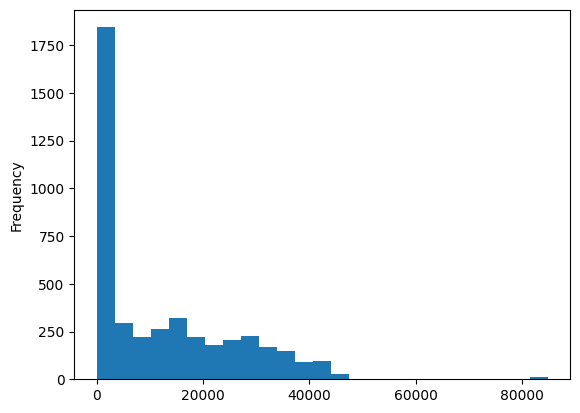

In [37]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

#  antes 4333

In [38]:
junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])

count     4333.000000
mean     12421.036926
std      13643.155061
min         60.000000
25%        495.000000
50%       7237.000000
75%      21851.000000
80%      25610.800000
85%      28890.400000
90%      32908.600000
95%      38027.200000
max      84800.000000
Name: duration(s), dtype: float64

In [40]:
38000/3600

10.555555555555555